In [4]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [5]:
data_set= pd.read_csv('user_data.csv') 
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [6]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  #Location 2,3 i.e Age & Salary.
y= data_set.iloc[:, 4].values      #Location 4 i.e Purchased.
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=1) #75% Training and 25% Testing.

In [7]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler   #StandardScalar is used to normalize the numerical values.
st_x= StandardScaler()    
x_train2= st_x.fit_transform(x_train)  #fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. 
x_test2= st_x.transform(x_test)  #transform () is used for the testing of data

In [8]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  #When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
classifier.fit(x_train, y_train)                                           #metric: str or callable, default=’minkowski’

KNeighborsClassifier()

In [9]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print('Confusion Matrix : \n',cm)

Confusion Matrix : 
 [[49  9]
 [16 26]]


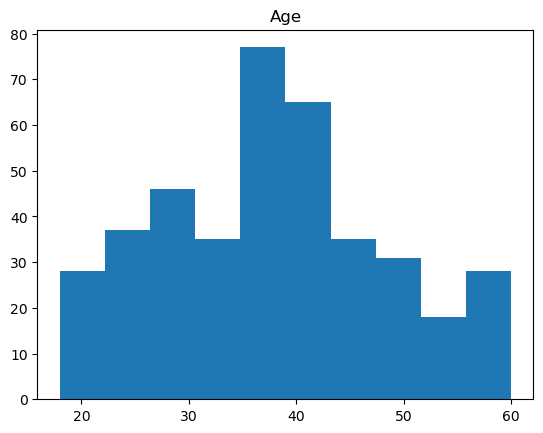

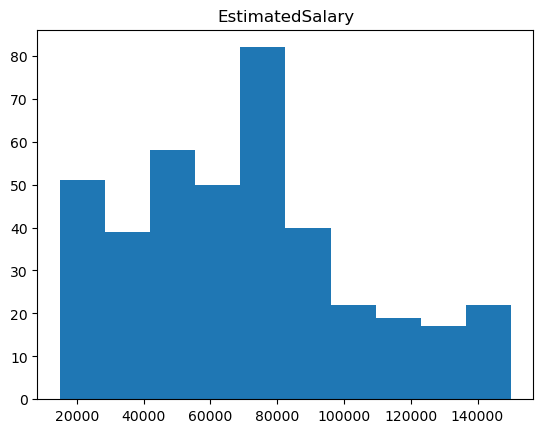

In [11]:
#histogram for training dataset
import matplotlib.pyplot as plt
plt.title("Age")
plt.hist(data_set.Age)
plt.show()
plt.title("EstimatedSalary")
plt.hist(data_set.EstimatedSalary)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
print ('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.75
